In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset=pd.read_csv('C:\\Users\\karti\\Desktop\\ML_Fifa\\final_FIFA_stats.csv')
dataset.head()

Acceleration  Aggression  Agility  Balance  BallControl  Composure  \
0            92          48       90       95           96         97   
1            89          63       89       63           93         95   
2            94          56       96       82           95         92   
3            88          87       86       78           91         85   
4            78          73       82       79           90         86   

   Crossing  Curve  Dribbling  Finishing  ...  SprintSpeed  Stamina  \
0        77     90         97         95  ...           87       73   
1        85     81         91         94  ...           91       92   
2        75     82         96         88  ...           90       78   
3        77     86         86         94  ...           77       89   
4        92     85         86         83  ...           76       88   

   StandingTackle  Strength  Vision  Volleys  Weak Foot  height  Fin_pos  \
0              28        59      92       86          4     170  Forward   
1              31        80      85       88          4     187  Forward   
2              24        53      83       83          5     175  Forward   
3              45        83      84       88          4     182  Forward   
4              58        73      92       82          5     181      Mid   

                     Player_name  
0                  Lionel Messi   
1  C. Ronaldo dos Santos Aveiro   
2    Neymar da Silva Santos Jr.   
3                   Luis Suárez   
4               Kevin De Bruyne   

[5 rows x 32 columns]

# Preprocessing

**1. Droping the missing values**

In [3]:
dataset = dataset.dropna(axis = 0, how ='any')

**2. Dependent(X) & Independent(Y) variable**

In [4]:
X=dataset.iloc[:,:-2].values                                                   
Y=dataset.iloc[:,30].values

In [5]:
X

array([[ 92,  48,  90, ...,  86,   4, 170],
       [ 89,  63,  89, ...,  88,   4, 187],
       [ 94,  56,  96, ...,  83,   5, 175],
       ...,
       [ 25,  52,  40, ...,  34,   3, 173],
       [ 58,  39,  57, ...,  34,   3, 178],
       [ 66,  26,  60, ...,  33,   2, 175]], dtype=int64)

In [6]:
Y

array(['Forward', 'Forward', 'Forward', ..., 'Mid', 'Mid', 'Forward'],
      dtype=object)

***3. Splitting data into training and testing***

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=0) 
#20 percent testing , Random state =0 means that the data is selected randomly
#3200 test


***4. Standard Scaler***

In [8]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train=sc_X.fit_transform(X_train)                                             #fit transform always for traing set
X_test=sc_X.transform(X_test)

# (i) Logistic Regression

**1. Training Model**

In [9]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(multi_class='multinomial', solver='newton-cg') #multinomial due to various attributes in X
classifier_lr.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

**2. Predicting the test set results**

In [10]:
Y_pred=classifier_lr.predict(X_test)

**3. Confusion Matrix**

[[0.91048593 0.00341006 0.08610401]
 [0.00314961 0.81259843 0.18425197]
 [0.06681034 0.07112069 0.86206897]]


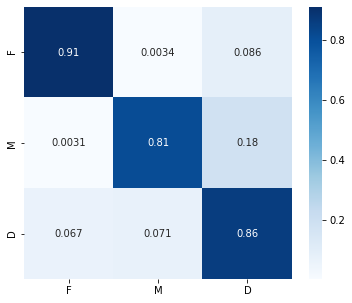

In [11]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred,normalize='true')
print(cm)
import seaborn as sn
plt.figure(figsize = (6,5))
sn.heatmap(cm, annot=True,cmap="Blues",xticklabels="FMD", yticklabels="D")

**4. Accuracy**

In [12]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print(precision_score(Y_test,Y_pred, average="macro"))
print(recall_score(Y_test,Y_pred, average="macro"))
print(f1_score(Y_test,Y_pred, average="macro"))
print(accuracy_score(Y_test,Y_pred))


0.8660598764978079
0.8617177747393093
0.8638141985037535
0.87


**5. Position of Gareth Bale**

In [13]:
gareth_bale=pd.read_csv('C:\\Users\\karti\\Desktop\\ML_Fifa\\GarethBale.csv')
gareth_bale

Acceleration  Aggression  Agility  Balance  BallControl  Composure  \
0            93          65       78       65           85         85   

   Crossing  Curve  Dribbling  Finishing  ...  Skill Moves  SlidingTackle  \
0        86     86         87         87  ...            4             52   

   SprintSpeed  Stamina  StandingTackle  Strength  Vision  Volleys  Weak Foot  \
0           95       76              55        80      79       80          3   

   height  
0     185  

[1 rows x 30 columns]

In [14]:
gareth_bale_position=classifier_lr.predict(gareth_bale)
print(gareth_bale_position)

['Defense']


# (ii) KNN

**1.Training Model**

In [15]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn=KNeighborsClassifier()
classifier_knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

**2. Predicting Test Set Results**

In [16]:
Y_pred=classifier_knn.predict(X_test)

**3. Confusion Matrix**

[[9.02813299e-01 8.52514919e-04 9.63341858e-02]
 [1.10236220e-02 7.55905512e-01 2.33070866e-01]
 [7.68678161e-02 6.39367816e-02 8.59195402e-01]]


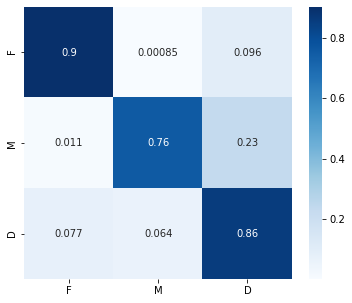

In [17]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred,normalize='true')
print(cm)
import seaborn as sn
plt.figure(figsize = (6,5))
sn.heatmap(cm, annot=True,cmap="Blues",xticklabels="FMD", yticklabels="FMD")

**4. Accuracy**

In [19]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print(precision_score(Y_test,Y_pred, average="macro"))
print(recall_score(Y_test,Y_pred, average="macro"))
print(f1_score(Y_test,Y_pred, average="macro"))
print(accuracy_score(Y_test,Y_pred))

0.855261117685461
0.8393047377808701
0.846362212250296
0.8546875


**5. Position of Gareth Bale**

In [20]:
gareth_bale_position=classifier_knn.predict(gareth_bale)
print(gareth_bale_position)

['Mid']


# (iii) SVM

**1. Training Model** 

In [21]:
from sklearn.svm import SVC
classifier_svm=SVC(kernel='linear',random_state=0)                                  #linear kernel used here
classifier_svm.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

**2. Predicting Testset Results**

In [22]:
Y_pred=classifier_svm.predict(X_test)

**3.Confusion Matrix**

[[0.90707587 0.00341006 0.08951407]
 [0.00629921 0.79370079 0.2       ]
 [0.06681034 0.05603448 0.87715517]]


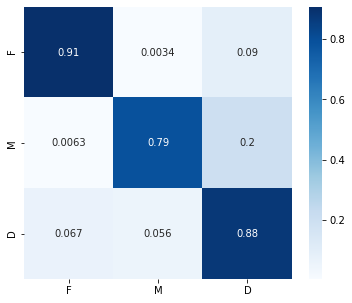

In [23]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred,normalize='true')
print(cm)
import seaborn as sn
plt.figure(figsize = (6,5))
sn.heatmap(cm, annot=True,cmap="Blues",xticklabels="FMD", yticklabels="FMD")

**4. Accuracy** 

In [24]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print(precision_score(Y_test,Y_pred, average="macro"))
print(recall_score(Y_test,Y_pred, average="macro"))
print(f1_score(Y_test,Y_pred, average="macro"))
print(accuracy_score(Y_test,Y_pred))

0.8722833151465291
0.8593106112143866
0.8652134358207793
0.8715625


**5.Position of Gareth Bale** 

In [25]:
gareth_bale_position=classifier_svm.predict(gareth_bale)
print(gareth_bale_position)

['Forward']


# (iv) Naive Bayes

**1. Training Model**

In [26]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

**2. Predicting Test set Results**

In [27]:
Y_pred=classifier_nb.predict(X_test)

**3. Confusion Matrix**

[[0.80051151 0.00341006 0.19607843]
 [0.00472441 0.85984252 0.13543307]
 [0.15229885 0.19468391 0.65301724]]


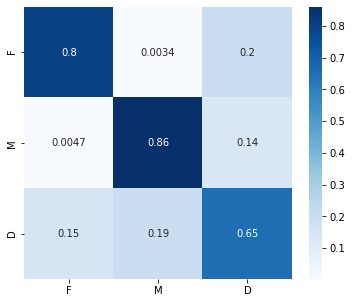

In [28]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred,normalize='true')
print(cm)
import seaborn as sn
plt.figure(figsize = (6,5))
sn.heatmap(cm, annot=True,cmap="Blues",xticklabels="FMD", yticklabels="FMD")

**4. Accuracy**

In [29]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print(precision_score(Y_test,Y_pred, average="macro"))
print(recall_score(Y_test,Y_pred, average="macro"))
print(f1_score(Y_test,Y_pred, average="macro"))
print(accuracy_score(Y_test,Y_pred))

0.7402583183544572
0.7711237566719188
0.7505787585354363
0.748125


**5. Position of Gareth Bale**

In [30]:
gareth_bale_position=classifier_nb.predict(gareth_bale)
print(gareth_bale_position)

['Defense']


# (v) Decision Tree

**1. Training Model**

In [31]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt=DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier_dt.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.515626 to fit



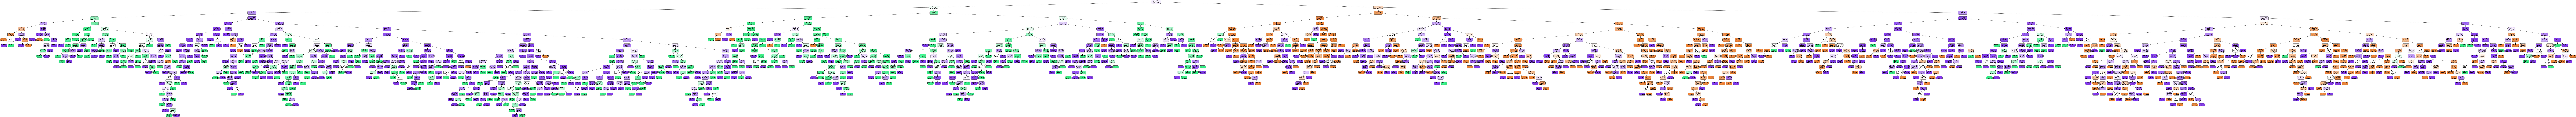

In [70]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data=StringIO()
export_graphviz(classifier_dt,out_file=dot_data,filled=True,rounded=True,special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

**2. Predicting Test set Results**

In [32]:
Y_pred=classifier_dt.predict(X_test)

**3. Confusion Matrix**

[[0.86530264 0.00341006 0.1312873 ]
 [0.00944882 0.76062992 0.22992126]
 [0.08764368 0.11278736 0.79956897]]


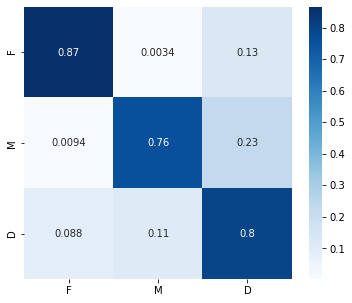

In [33]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred,normalize='true')
print(cm)
import seaborn as sn
plt.figure(figsize = (6,5))
sn.heatmap(cm, annot=True,cmap="Blues",xticklabels="FMD", yticklabels="FMD")

**4. Accuracy**

In [34]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print(precision_score(Y_test,Y_pred, average="macro"))
print(recall_score(Y_test,Y_pred, average="macro"))
print(f1_score(Y_test,Y_pred, average="macro"))
print(accuracy_score(Y_test,Y_pred))

0.8085665910657135
0.8085005098577774
0.8084572248489693
0.8159375


**5. Position of Gareth Bale**

In [35]:
gareth_bale_position=classifier_dt.predict(gareth_bale)
print(gareth_bale_position)

['Mid']


# (vi) Random Forest

**1. Training Model**

In [36]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier_rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

**2. Predicting Test set Results**

In [37]:
Y_pred=classifier_rf.predict(X_test)

**3. Confusion Matrix**

[[0.92668372 0.00341006 0.06990622]
 [0.00314961 0.82519685 0.17165354]
 [0.08764368 0.08979885 0.82255747]]


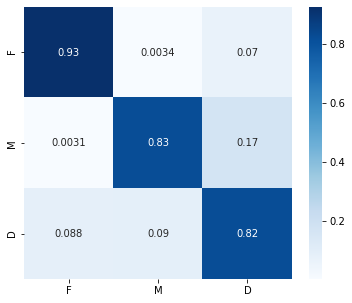

In [38]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred,normalize='true')
print(cm)
import seaborn as sn
plt.figure(figsize = (6,5))
sn.heatmap(cm, annot=True,cmap="Blues",xticklabels="FMD", yticklabels="FMD")

**4. Accuracy**

In [39]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print(precision_score(Y_test,Y_pred, average="macro"))
print(recall_score(Y_test,Y_pred, average="macro"))
print(f1_score(Y_test,Y_pred, average="macro"))
print(accuracy_score(Y_test,Y_pred))

0.8523638142470898
0.8581460128743719
0.8550067210668036
0.86125


**5. Gareth Bale Position**

In [40]:
gareth_bale_position=classifier_rf.predict(gareth_bale)
print(gareth_bale_position)

['Defense']
